In [44]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import os
from sklearn.preprocessing import MinMaxScaler

In [8]:
path = "C:/Users/jaing5/Desktop/upwork/project_dennis/AUD_CAD/"

In [9]:
import os
import glob
import pandas as pd
os.chdir(path)

In [10]:
list_csv = os.listdir(path)

In [11]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [12]:
all_filenames

['AUDCAD.CSV']

In [13]:
combined_csv = pd.concat([pd.read_csv(f) for f in list_csv ])

In [14]:
combined_csv


,Date,Open,High,Low,Close
0,1/2/1991,0.8958,0.8996,0.8947,0.8950
1,1/3/1991,0.8950,0.9009,0.8944,0.8976
2,1/4/1991,0.8980,0.9007,0.8966,0.8969
3,1/7/1991,0.8964,0.9013,0.8939,0.8977
4,1/8/1991,0.8977,0.8987,0.8941,0.8965
...,...,...,...,...,...
7376,4/13/2020,0.8851,0.8918,0.8833,0.8877
7377,4/14/2020,0.8879,0.8962,0.8864,0.8950
7378,4/15/2020,0.8948,0.8957,0.8846,0.8910
7379,4/16/2020,0.8921,0.8935,0.8853,0.8903


In [111]:
df = combined_csv.sort_values(by="OpenTime")

In [112]:
df

,Ticket,Symbol,Action,OpenTime,OpenPrice,Size,CloseTime,ClosePrice,PL,Comment,Unused1,Unused2,Unused3,Unused4,Unused5
0,1,AUDUSD,Buy,2003-08-13 21:00:02.226,0.6582,0.01,2003-08-27 21:00:03.467,0.6391,-19.69,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
0,1,AUDUSD,Buy,2003-08-13 21:00:02.226,0.6582,0.01,2003-08-27 21:00:03.467,0.6391,-19.69,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
0,1,AUDUSD,Sell,2003-08-18 00:00:04.527,0.6609,0.01,2003-08-27 21:00:03.467,0.6391,21.44,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
1,2,AUDUSD,Buy,2003-08-27 21:00:03.467,0.6391,0.01,2003-08-28 21:00:02.279,0.6399,0.58,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
2,3,AUDUSD,Sell,2003-08-28 21:00:02.279,0.6399,0.01,2003-09-04 21:00:00.815,0.6420,-2.54,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,AUDUSD,Sell,2020-03-23 21:03:45.855,0.5823,0.01,2020-03-24 21:00:02.898,0.5954,-14.76,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
776,777,AUDUSD,Buy,2020-03-23 21:03:45.855,0.5823,0.01,2020-03-24 21:00:02.898,0.5954,11.50,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
818,819,AUDUSD,Buy,2020-03-23 21:03:45.855,0.5823,0.01,2020-03-24 21:00:02.898,0.5954,11.50,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0
777,778,AUDUSD,Sell,2020-03-24 21:00:02.898,0.5954,0.01,2020-03-25 21:00:00.070,0.5958,-1.69,D:\Synergy Development\Signals\AUDUSD\24122019...,0,0,0,0,0


In [102]:
training_set = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [15]:
training_set = combined_csv

In [17]:
feature_columns = ['Open', 'High', 'Low']

In [18]:
training_set

,Date,Open,High,Low,Close
0,1/2/1991,0.8958,0.8996,0.8947,0.8950
1,1/3/1991,0.8950,0.9009,0.8944,0.8976
2,1/4/1991,0.8980,0.9007,0.8966,0.8969
3,1/7/1991,0.8964,0.9013,0.8939,0.8977
4,1/8/1991,0.8977,0.8987,0.8941,0.8965
...,...,...,...,...,...
7376,4/13/2020,0.8851,0.8918,0.8833,0.8877
7377,4/14/2020,0.8879,0.8962,0.8864,0.8950
7378,4/15/2020,0.8948,0.8957,0.8846,0.8910
7379,4/16/2020,0.8921,0.8935,0.8853,0.8903


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(training_set[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=training_set.index)
feature_minmax_transform.head()

,Open,High,Low
0,0.402706,0.382960,0.466093
1,0.400403,0.386792,0.465310
2,0.409039,0.386203,0.471049
3,0.404433,0.387972,0.464006
4,0.408175,0.380307,0.464528


In [20]:
target_adj_close = pd.DataFrame(training_set['Close'])

In [21]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low
0,0.402706,0.382960,0.466093
1,0.400403,0.386792,0.465310
2,0.409039,0.386203,0.471049
3,0.404433,0.387972,0.464006
4,0.408175,0.380307,0.464528


Shape of features :  (7381, 3)
Shape of target :  (7381, 1)


,Open,High,Low
7375,0.376223,0.353184,0.436098
7376,0.371906,0.359965,0.436359
7377,0.379965,0.372936,0.444444
7378,0.399827,0.371462,0.439750
7379,0.392055,0.364976,0.441575


,Close
7375,0.8877
7376,0.8950
7377,0.8910
7378,0.8903
7379,0.8931



 -----After process------ 

Shape of features :  (7291, 3)
Shape of target :  (7291, 1)


,Close
7286,0.9041
7287,0.9005
7288,0.9069
7289,0.9041
7290,0.9017


In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model


Using TensorFlow backend.
C:\Users\jaing5\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jaing5\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jaing5\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jaing5\AppData

In [25]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [26]:
X_train.shape

(6629, 3)

In [27]:
X_test.shape

(662, 3)

In [28]:
y_train.shape

(6629,)

In [29]:
y_test.shape

(662,)

In [30]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  0.009002194948393915
R2 score:  0.7853483561038945


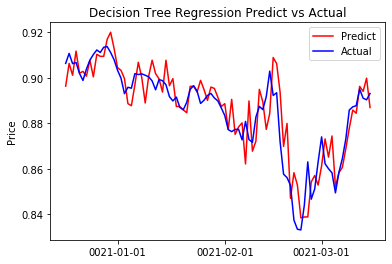

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

In [32]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [33]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=40, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])






Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/40
6629/6629 [==============================] - 3s - loss: 0.0842     
Epoch 2/40
6629/6629 [==============================] - 2s - loss: 0.0066     
Epoch 3/40
6629/6629 [==============================] - 2s - loss: 0.0017     
Epoch 4/40
6629/6629 [==============================] - 2s - loss: 3.4875e-04     
Epoch 5/40
6629/6629 [==============================] - 2s - loss: 7.6233e-05     
Epoch 6/40
6629/6629 [==============================] - 2s - loss: 4.5519e-05     
Epoch 7/40
6629/6629 [==============================] - 2s - loss: 5.1890e-05     
Epoch 8/40
6629/6629 [==============================] - 2s - loss: 6.5550e-05     
Epoch 9/40
6629/6629 [==============================] - 2

In [34]:

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.898
The R2 score on the Test set is:	0.801


In [35]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

621/662 [===========================>..] - ETA: 0s

In [36]:
print('LSTM: %f'%score_lstm)

LSTM: 0.000233


In [39]:
X_tst_t

array([[[0.76827864, 0.75972877, 0.7942097 ]],

       [[0.76885435, 0.75324292, 0.77230047]],

       [[0.75417386, 0.74056604, 0.77386541]],

       ...,

       [[0.42803685, 0.39799528, 0.47496088]],

       [[0.41594704, 0.40831368, 0.47991654]],

       [[0.43465746, 0.40713443, 0.48852374]]])

In [37]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

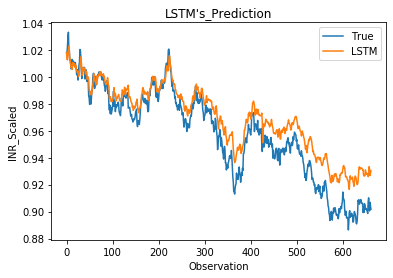

In [38]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [41]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_csv('PredictionResults_LSTM_NonShift.csv')